<a href="https://colab.research.google.com/github/khanel/style_transfer/blob/main/style_transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

this notebook is an implementation of this paper titled ['Image Style Transfer Using Convolutional Neural Network'](https://www.cv-foundation.org/openaccess/content_cvpr_2016/papers/Gatys_Image_Style_Transfer_CVPR_2016_paper.pdf). However, please note that my implementation will not cover all aspects presented in the paper.

Before delving into the paper, let's first examine the output of the convolutional layers in a trained Convolutional Neural Network (CNN). For this purpose, we will use the pre-trained VGG19 model.
First of all, we'll begin by adding the necessary packages to our project. We'll fetch the VGG19 model with pre-trained weights, which can be easily obtained using the torchvision package in PyTorch.

In [4]:
import torch
import torchvision.models as models

# Load the pre-trained VGG19 model
vgg19 = models.vgg19(pretrained=True)

# Set the model to evaluation mode
vgg19.eval()


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

We will use Van Gogh's "The Starry Night" painting as an example to observe the output of the first convolutional layer.

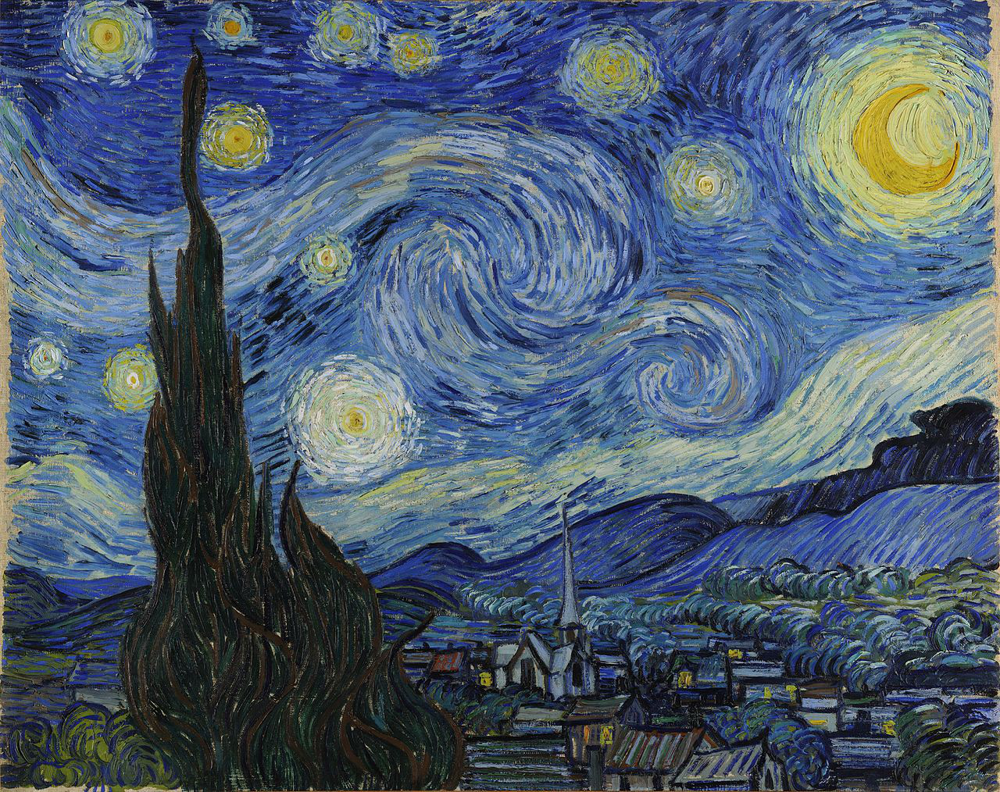

In [15]:
import urllib.request
from PIL import Image, ImageFile

# Enable PIL to handle large images
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Direct link to the image
image_url = "https://www.vangoghgallery.com/img/starry_night_full.jpg"

# Fetch the image from the URL
image_data = urllib.request.urlopen(image_url)

# Load the image from the fetched data
image = Image.open(image_data)

# Resize the image to a maximum width or height of 1000 pixels
max_size = 1000
image.thumbnail((max_size, max_size))

# Display or perform operations on the resized image as needed
image.show()


In VGG19, the model is divided into three main parts: features, average pooling, and classifier.

1. Features:
The features part consists of a series of convolutional layers, ReLU activation functions, and max pooling.It consist fo 5 series (seperated by maxpooling).These layers are responsible for learning hierarchical representations of the input image. In VGG19, the first convolutional layer can be accessed using `vgg19.features[0]`. It produces 64 output channels.

2. Average Pooling:
After the features part, the output is passed through average pooling layers. These layers downsample the spatial dimensions of the features while preserving important information.

3. Classifier:
The classifier part of VGG19 consists of fully connected layers that map the extracted features to the final class probabilities. It performs classification based on the learned representations.

In our case, we are particularly interested in the features part, which includes the convolutional layers, ReLU activation functions, and max pooling. We specifically access the first convolutional layer using `vgg19.features[0]`, which produces 64 output channels.

By passing an image through this first convolutional layer, we can observe the response of the network to the input image and visualize the output channels.

In [111]:
import numpy as np
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

def pass_image_through_model(image, model, layer_index):
    # Define the image transformation
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize the image to the model's input size
        transforms.ToTensor(),  # Convert the image to a tensor
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize the image
    ])

    # Load and transform the image
    input_tensor = transform(image).unsqueeze(0)

    # Pass the image through the model until the specified layer index
    output = input_tensor
    for i in range(layer_index+1):
        output = model.features[i](output)

    
    return output.squeeze()



def display_output_tensor(output_tensor):
    # Convert the tensor to a numpy array
    output_array = output_tensor.detach().numpy()

    # Calculate the number of output images and their layout
    num_images = 64
    rows = int(num_images ** 0.5)
    cols = int(num_images / rows)

    # Create subplots for each output image
    fig, axes = plt.subplots(rows, cols, figsize=(18, 18))

    # Flatten the axes if necessary
    if num_images == 1:
        axes = [axes]

    # Display each output image
    for i, ax in enumerate(axes.flat):
        ax.imshow(output_array[i], cmap='gray')
        ax.axis('off')

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()


output_tensor = pass_image_through_model(image=image, model=vgg19, layer_index=5)
display_output_tensor(output_tensor)




let's see one of them with details

In [112]:
output_tensor = pass_image_through_model(image=image, model=vgg19, layer_index=0)
output_array = output_tensor.detach().numpy()
display_size = (500, 500)

output_image = output_tensor[0].detach().numpy()
plt.figure(figsize=(10, 10))
plt.imshow(output_image, cmap='gray')
plt.axis('off')
plt.show()

As you can see from the outputs this layer is capable of identifying significant patterns and shapes in the input image.The first convolutional layer in VGG19 performs local receptive field operations, where each neuron is connected to a small region of the input image. By applying various filters, such as edge detectors or texture extractors, the layer can detect specific features in the image.

Convolutional layers in neural networks tend to discard fine details while emphasizing important content in an image. For instance, the tree may lose some details but gain a more distinct shape.

This behavior helps convolutional layers focus on capturing essential features, making them effective in tasks like image recognition. By prioritizing important content over intricate details, the network becomes better at identifying key patterns and shapes in the data.

It is important to note that the VGG19 model used in this example is pretrained on a large dataset, such as ImageNet.

Feel free to further explore and analyze other output channels of the first convolutional layer to deepen your understanding of how convolutional neural networks can capture and represent visual information.
